In [1]:
import pandas as pd
import os

path = "./Data2/"
dir_list = os.listdir(path)
allData = [file for file in dir_list if "-" in file and ".csv" in file]
allData.remove("2000-2001.csv")
df = pd.DataFrame()

for file in allData:
    pathFile = os.path.join(path,file)
    data = pd.read_csv(pathFile,error_bad_lines=False)
    try:
        df = df.append(data[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]])
    except:
        print(file)


b'Skipping line 337: expected 57 fields, saw 62\nSkipping line 338: expected 57 fields, saw 62\nSkipping line 339: expected 57 fields, saw 62\nSkipping line 340: expected 57 fields, saw 62\nSkipping line 341: expected 57 fields, saw 62\nSkipping line 342: expected 57 fields, saw 62\nSkipping line 343: expected 57 fields, saw 62\nSkipping line 344: expected 57 fields, saw 62\nSkipping line 345: expected 57 fields, saw 62\nSkipping line 346: expected 57 fields, saw 62\nSkipping line 347: expected 57 fields, saw 62\nSkipping line 348: expected 57 fields, saw 62\nSkipping line 349: expected 57 fields, saw 62\nSkipping line 350: expected 57 fields, saw 62\nSkipping line 351: expected 57 fields, saw 62\nSkipping line 352: expected 57 fields, saw 62\nSkipping line 353: expected 57 fields, saw 62\nSkipping line 354: expected 57 fields, saw 62\nSkipping line 355: expected 57 fields, saw 62\nSkipping line 356: expected 57 fields, saw 62\nSkipping line 357: expected 57 fields, saw 62\nSkipping li

In [2]:
df['Date']= pd.to_datetime(df['Date'])

In [5]:
df= df[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]]

In [6]:
def addHighest(row):
    H = row["B365H"]
    D = row["B365D"]
    A = row["B365A"]
    
    bet = min([H,D,A])
    if bet == H:
        row["bet"] = "H"
    if bet == D:
        row["bet"] = "D"
    if bet == A:
        row["bet"] = "A"
        
    return row

df = df.apply(addHighest,axis = 1)

In [7]:
def checkBet(row):
    if row["bet"] == row["FTR"]:
        row["result"] = 1
    else:
        row["result"] = 0
    return row

df = df.apply(checkBet,axis = 1)

In [8]:
budgetPos = 0
temp= []
budgetNeg = 0
betAmount = 1
for index, row in df.iterrows():
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
        
    if row["result"] == 0:
        budgetNeg -= betAmount
        row["amount"] = -betAmount
    else:
        temp.append(row["result"] * float(odd)*betAmount - betAmount)
        row["amount"] = row["result"] * float(odd)*betAmount - betAmount

In [9]:
def addAmountGainAndExpectedValue(row):
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
        
    if row["result"] == 0:
        row["amount"] = -betAmount
    else:
        row["amount"] = row["result"] * float(odd)*betAmount
    
    row["WinOdd"] = odd
    row["WinProbability"] = (1/odd)     
    row["LossProbability"] = 1 - (1/odd) 
#    one unit only
    row["ExpectedProfit"] = odd*1
    
    row["ExpectedValue"] = (1/odd)*row["ExpectedProfit"] - (1/odd)
        
       
    return row

df = df.apply(addAmountGainAndExpectedValue,axis =1)

In [10]:
start_date = "2000-01-01"
end_date = "2021-12-31"
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

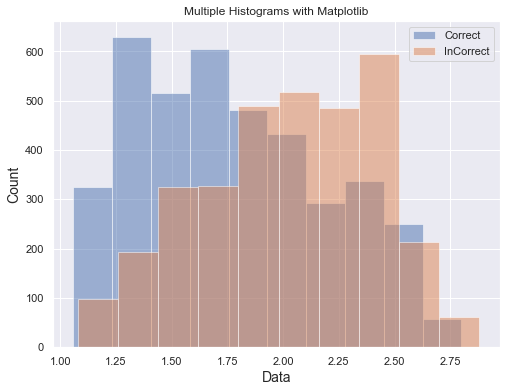

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(8,6))
plt.hist(df[df["result"] == 1]["WinOdd"], alpha=0.5, label="Correct")
plt.hist(df[df["result"] == 0]["WinOdd"], alpha=0.5, label="InCorrect")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

In [13]:
# /------------------------------------------------------------------------------------

In [14]:
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result,amount,WinOdd,WinProbability,LossProbability,ExpectedProfit,ExpectedValue
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,H,0,-1.000,1.727,0.579039,0.420961,1.727,0.420961
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,A,1,2.200,2.200,0.454545,0.545455,2.200,0.545455
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,H,0,-1.000,2.250,0.444444,0.555556,2.250,0.555556
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,H,1,1.727,1.727,0.579039,0.420961,1.727,0.420961
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,H,1,1.667,1.667,0.599880,0.400120,1.667,0.400120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,H,1,1.570,1.570,0.636943,0.363057,1.570,0.363057
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,A,0,-1.000,2.450,0.408163,0.591837,2.450,0.591837
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,H,1,1.220,1.220,0.819672,0.180328,1.220,0.180328
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,A,1,1.530,1.530,0.653595,0.346405,1.530,0.346405


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(testy, df)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()